# Video search with Face Recognition

Google Colab Setup
---

Make sure to select GPU in `Runtime` > `Change runtime type` > `Hardware accelerator`

In [1]:
#@title << Setup Google Colab by running this cell {display-mode: "form"}
import sys
if 'google.colab' in sys.modules:
    # Check GPU instance
    import torch
    if not torch.cuda.is_available():
        print('Select GPU in Google Colab: Runtime > Change runtime type > Hardware accelerator')
        
    else:
        # Cleanup previous files
        !rm -r *
        
        # Clone GitHub repository
        !git clone https://github.com/epfl-exts/amld20-video-search.git

        # Copy files required to run the code
        !cp -r "amld20-video-search/data" "amld20-video-search/helpers.py" "amld20-video-search/fonts" .

        # Install packages via pip
        !pip install -r "amld20-video-search/colab-requirements.txt"

        # Restart Runtime
        import os
        os.kill(os.getpid(), 9)

Get Data
---

Open the video in a new tab: [Youtube link](https://www.youtube.com/watch?v=NpQlxN4xbKM) or [NASA Video Library](https://images.nasa.gov/details-KSC-20191220-VP-MMS02-0001-CCP_Boeing_Orbital_Flight_Test_Post_Launch_News_Conference-3239211)

In [2]:
%run helpers.py

# Download video
name = 'boeing-oft.mp4'
url = 'https://images-assets.nasa.gov/video/NHQ_2019_1220_Boeing%20Orbital%20Flight%20Test%20Launch%20Team%20Post-Launch%20News%20Conference/NHQ_2019_1220_Boeing%20Orbital%20Flight%20Test%20Launch%20Team%20Post-Launch%20News%20Conference~small.mp4'
download_video(url, name);

Extract frames
---

In [3]:
frames_df = extract_frames('boeing-oft.mp4', n_frames=300, max_frame_size=512)
frames_df.head()

,path,frame_index,sec,width,height
0,data/frames/frame-000000000.png,0,0.000000,512,288
1,data/frames/frame-000000287.png,287,9.566667,512,288
2,data/frames/frame-000000575.png,575,19.166667,512,288
3,data/frames/frame-000000863.png,863,28.766667,512,288
4,data/frames/frame-000001151.png,1151,38.366667,512,288


Face recognition
---

In [4]:
import dlib

# Face detectors: finding bounding boxes around faces (rectangles)
hog_detector = dlib.get_frontal_face_detector()
cnn_detector = dlib.cnn_face_detection_model_v1(get_dlib_path('mmod_human_face_detector.dat'))

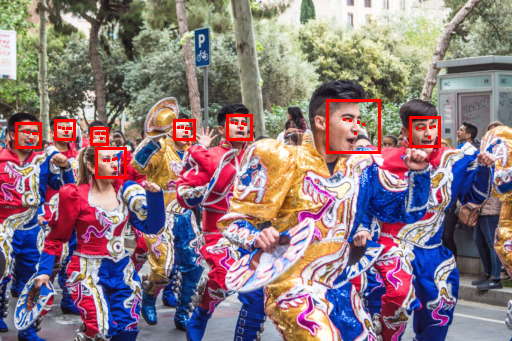

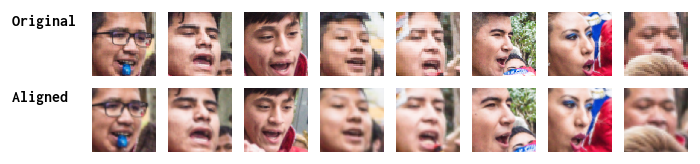

In [5]:
# Exercise: Bolivian dancers
face_recognition(
    'data/images/bolivian-dancers.jpg',
    face_detector=hog_detector,
    resize_img=1024
)

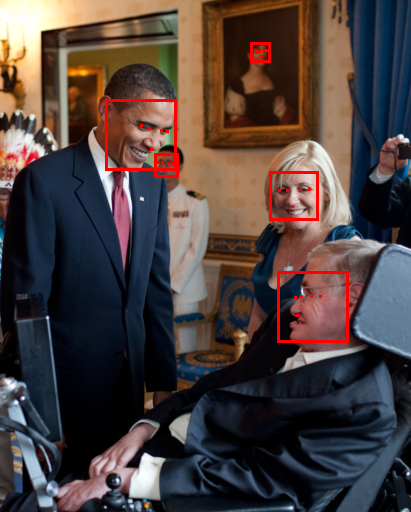

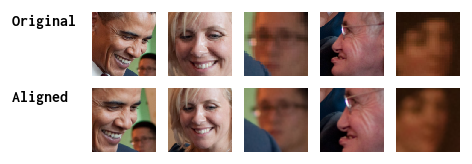

In [6]:
# Exercise: Stephen Hawking
face_recognition(
    'data/images/stephen-hawking.jpg',
    face_detector=cnn_detector,
    resize_img=1024
)

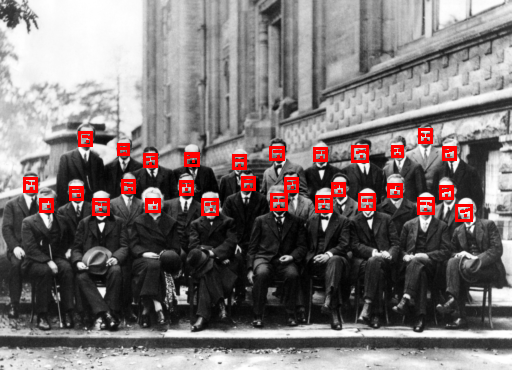

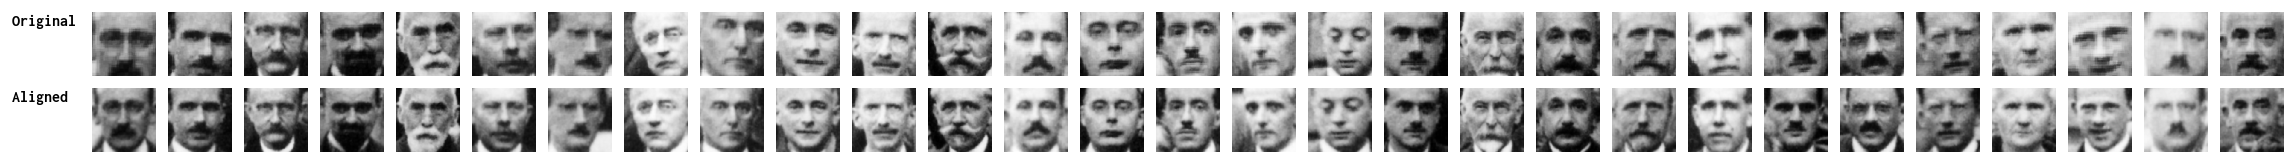

In [7]:
# Exercise: Solvay conference 1927
face_recognition(
    'data/images/solvay-conference-1927.jpg',
    face_detector=cnn_detector,
    resize_img=2048
)

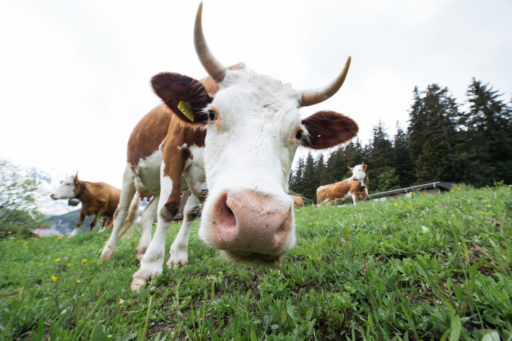

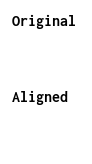

In [8]:
# Exercise: Swiss cow
face_recognition(
    'data/images/swiss-cow.jpg',
    face_detector=hog_detector,
    resize_img=512
)

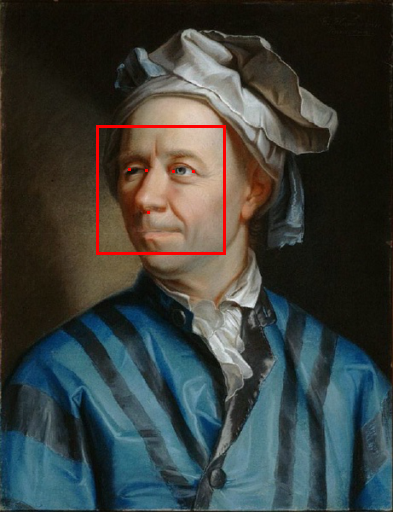

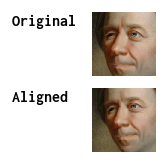

In [9]:
# Test with your own images!
url = 'https://upload.wikimedia.org/wikipedia/commons/d/d7/Leonhard_Euler.jpg'
download_image(url, 'example.jpg')
face_recognition(
    'data/images/example.jpg',
    face_detector=hog_detector,
    resize_img=512
)

Face recognition on video
---

In [10]:
# Extract faces from video frames
extract_faces('data/frames', face_detector=hog_detector, resize_img=None)

Visualize embeddings
---

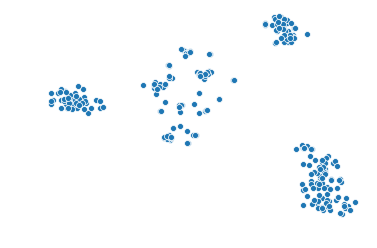

In [11]:
# Visualize the face "embeddings"
plot_embeddings('data/faces')

Clustering
---

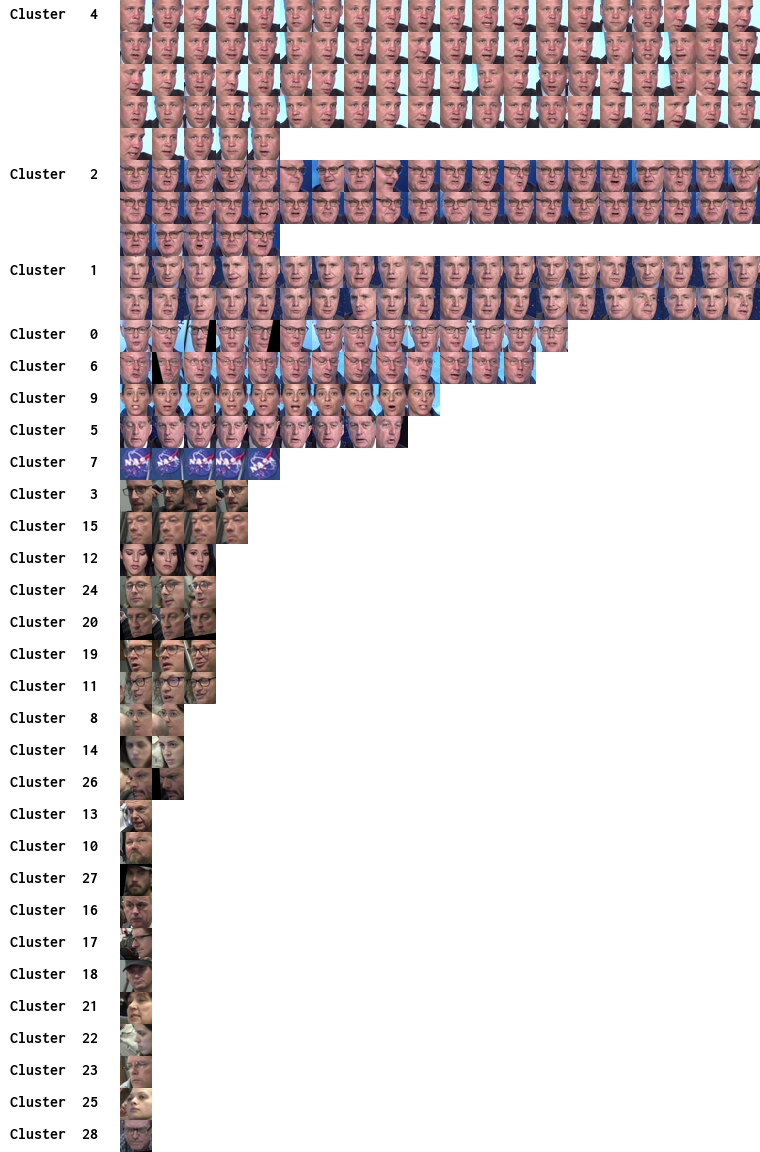

In [12]:
# Visualize clusters of faces according to the embedding
plot_clusters('data/faces')

Video timeline
---


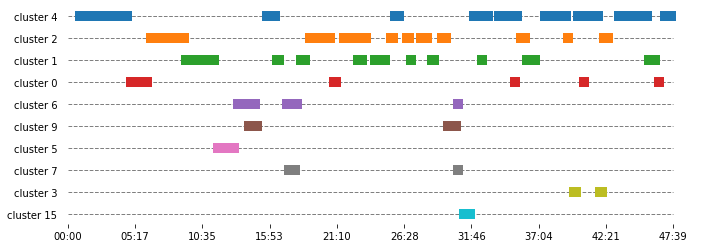

In [13]:
# Plot video timeline
plot_timeline('data/frames', 'data/faces')